## Animation

**This notebook is a work in progress. Don't use it!**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


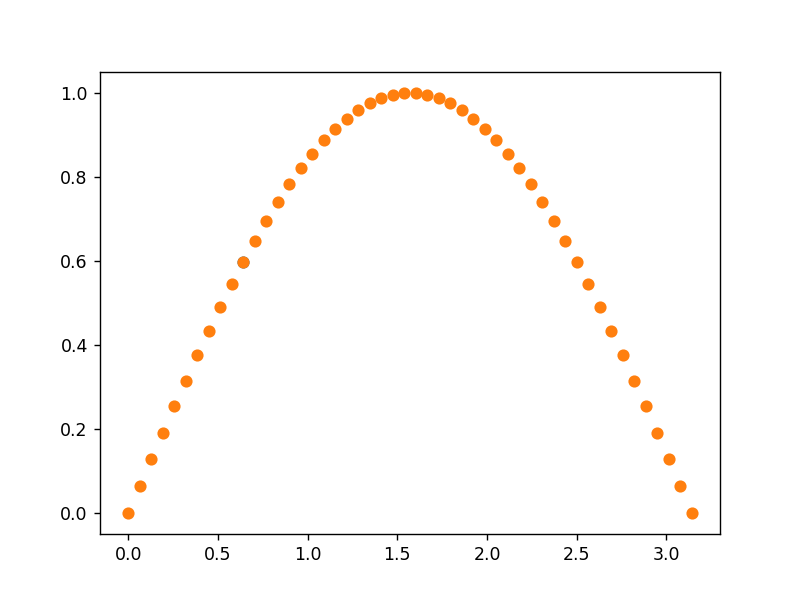

In [2]:
x = np.linspace(0, np.pi)
y = np.sin(x)

plt.scatter(x[10], y[10])

In [3]:
data = np.stack([x, y])

In [4]:
data

array([[0.00000000e+00, 6.41141358e-02, 1.28228272e-01, 1.92342407e-01,
        2.56456543e-01, 3.20570679e-01, 3.84684815e-01, 4.48798951e-01,
        5.12913086e-01, 5.77027222e-01, 6.41141358e-01, 7.05255494e-01,
        7.69369629e-01, 8.33483765e-01, 8.97597901e-01, 9.61712037e-01,
        1.02582617e+00, 1.08994031e+00, 1.15405444e+00, 1.21816858e+00,
        1.28228272e+00, 1.34639685e+00, 1.41051099e+00, 1.47462512e+00,
        1.53873926e+00, 1.60285339e+00, 1.66696753e+00, 1.73108167e+00,
        1.79519580e+00, 1.85930994e+00, 1.92342407e+00, 1.98753821e+00,
        2.05165235e+00, 2.11576648e+00, 2.17988062e+00, 2.24399475e+00,
        2.30810889e+00, 2.37222302e+00, 2.43633716e+00, 2.50045130e+00,
        2.56456543e+00, 2.62867957e+00, 2.69279370e+00, 2.75690784e+00,
        2.82102197e+00, 2.88513611e+00, 2.94925025e+00, 3.01336438e+00,
        3.07747852e+00, 3.14159265e+00],
       [0.00000000e+00, 6.40702200e-02, 1.27877162e-01, 1.91158629e-01,
        2.53654584e-01,

In [5]:
plt.scatter(*data)

<IPython.core.display.Javascript object>


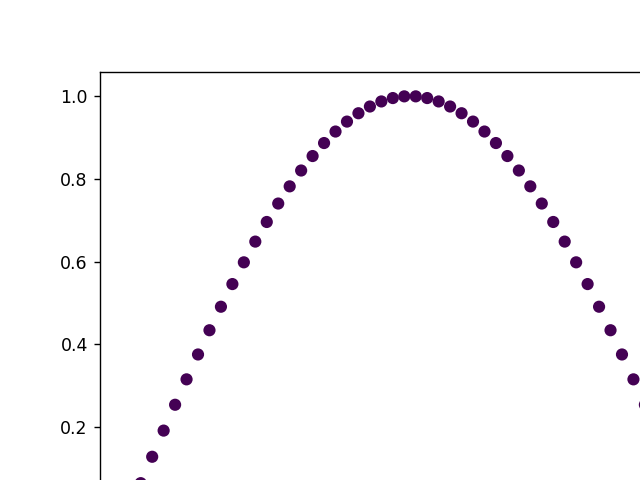

In [6]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
sct = plt.scatter(x, y)

def updatefig(i, data, sct):
    sct.set_array(data.T[i])
    return sct,

ani = animation.FuncAnimation(fig, updatefig, frames=range(50), interval=50, fargs=(data, sct))

#plt.close(ani._fig)
plt.show()

In [7]:
ani.save('animation_01.gif', writer='imagemagick', fps=30)

In [8]:
# from IPython.display import Image
from IPython.display import Image
Image(url='animation_01.gif')

<IPython.core.display.Javascript object>


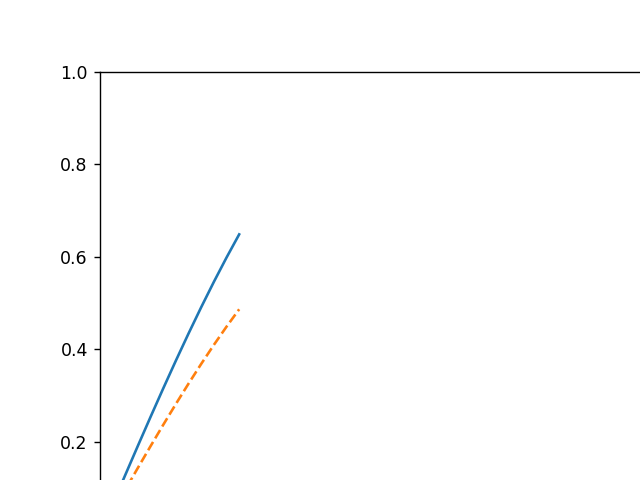

In [9]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot([],[], '-')
line2, = ax.plot([],[],'--')
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(y), np.max(y))

def animate(i,factor):
    line.set_xdata(x[:i])
    line.set_ydata(y[:i])
    line2.set_xdata(x[:i])
    line2.set_ydata(factor*y[:i])
    return line,line2

K = 0.75 # any factor 
ani = animation.FuncAnimation(fig, animate, frames=len(x), fargs=(K,),
                              interval=100, blit=True)
plt.show()

In [10]:
ani.save('animation_02.gif', writer='imagemagick', fps=30)

In [11]:
Image(url='animation_02.gif')

## From `matplotlib` website

<IPython.core.display.Javascript object>


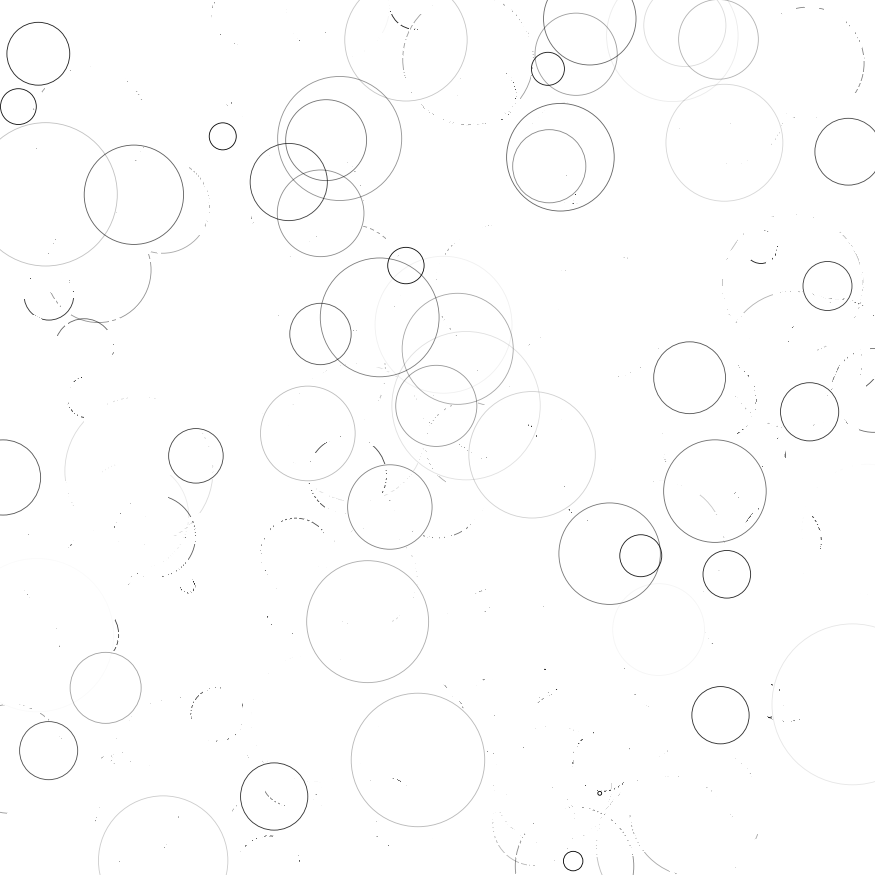

In [12]:
"""
===============
Rain simulation
===============

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = animation.FuncAnimation(fig, update, interval=10)
plt.show()

<IPython.core.display.Javascript object>


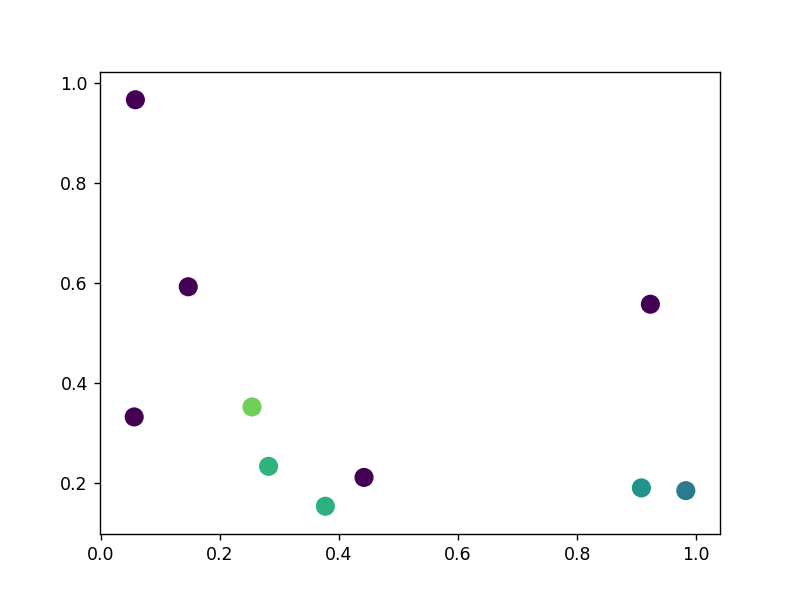

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes), fargs=(color_data, scat))
    
    ani.save('animation_03.gif', writer='imagemagick', fps=30)
    
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()


In [14]:
# from IPython.display import Image
from IPython.display import Image
Image(url='animation_03.gif')

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2019</p>
</div>